<a href="https://colab.research.google.com/github/Viraj-Kadlag05/Hoya_Plant_Disease_Predictor/blob/main/Final_ML_model_for_Plant_Disease_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [76]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [77]:
pwd

'/content/gdrive/My Drive/Kaggle/Plant Disease Dataset/Train'

In [78]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [79]:
!ls

 kaggle.json
'Machine Learning Model'
'new plant diseases dataset(augmented)'
'New Plant Diseases Dataset(Augmented)'
'Plant Disease Dataset'
 test


In [80]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [81]:
image_size=224
train_gen = keras.preprocessing.image.ImageDataGenerator()
test_gen = keras.preprocessing.image.ImageDataGenerator()

In [82]:
train_gen = train_gen.flow_from_directory("/content/gdrive/MyDrive/Kaggle/Plant Disease Dataset/Train", target_size=(image_size,image_size), class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest')

Found 4254 images belonging to 38 classes.


In [83]:
test_gen = test_gen.flow_from_directory("/content/gdrive/MyDrive/Kaggle/Plant Disease Dataset/Valid", target_size=(image_size,image_size), class_mode='categorical', batch_size=32, shuffle=True, seed=None, save_to_dir=None, save_prefix='', save_format='png', follow_links=False, subset=None, interpolation='nearest')

Found 1170 images belonging to 38 classes.


In [84]:
pwd

'/content/gdrive/MyDrive/Kaggle'

In [85]:
%cd /content/gdrive/MyDrive/Kaggle/Plant Disease Dataset/Train

/content/gdrive/MyDrive/Kaggle/Plant Disease Dataset/Train


In [86]:
!ls

 Apple___Apple_scab
 Apple___Black_rot
 Apple___Cedar_apple_rust
 Apple___healthy
 Blueberry___healthy
'Cherry_(including_sour)___healthy'
'Cherry_(including_sour)___Powdery_mildew'
'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
'Corn_(maize)___Common_rust'
'Corn_(maize)___healthy'
'Corn_(maize)___Northern_Leaf_Blight'
 Grape___Black_rot
'Grape___Esca_(Black_Measles)'
 Grape___healthy
'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'
'Orange___Haunglongbing_(Citrus_greening)'
 Peach___Bacterial_spot
 Peach___healthy
 Pepper__bell___Bacterial_spot
 Pepper__bell___healthy
 Potato___Early_blight
 Potato___healthy
 Potato___Late_blight
 Raspberry___healthy
 Soybean___healthy
 Squash___Powdery_mildew
 Strawberry___healthy
 Strawberry___Leaf_scorch
 Tomato___Bacterial_spot
 Tomato___Early_blight
 Tomato___healthy
 Tomato___Late_blight
 Tomato___Leaf_Mold
 Tomato___Septoria_leaf_spot
'Tomato___Spider_mites Two-spotted_spider_mite'
 Tomato___Target_Spot
 Tomato___Tomato_mosaic_virus
 Tomato__

In [87]:
Lables = train_gen.class_indices

In [88]:
train_gen.image_shape

(224, 224, 3)

In [89]:
print(Lables)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper__bell___Bacterial_spot': 18, 'Pepper__bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato_

In [90]:
type(Lables)

dict

In [91]:
Lables.keys()
labels_list = list(Lables.keys())
labels_list

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper__bell___Bacterial_spot',
 'Pepper__bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_s

In [92]:
details_list = []
for i in labels_list:
  details = i.split("___")
  details_list.append(details)
print(details_list)

[['Apple', 'Apple_scab'], ['Apple', 'Black_rot'], ['Apple', 'Cedar_apple_rust'], ['Apple', 'healthy'], ['Blueberry', 'healthy'], ['Cherry_(including_sour)', 'Powdery_mildew'], ['Cherry_(including_sour)', 'healthy'], ['Corn_(maize)', 'Cercospora_leaf_spot Gray_leaf_spot'], ['Corn_(maize)', 'Common_rust'], ['Corn_(maize)', 'Northern_Leaf_Blight'], ['Corn_(maize)', 'healthy'], ['Grape', 'Black_rot'], ['Grape', 'Esca_(Black_Measles)'], ['Grape', 'Leaf_blight_(Isariopsis_Leaf_Spot)'], ['Grape', 'healthy'], ['Orange', 'Haunglongbing_(Citrus_greening)'], ['Peach', 'Bacterial_spot'], ['Peach', 'healthy'], ['Pepper__bell', 'Bacterial_spot'], ['Pepper__bell', 'healthy'], ['Potato', 'Early_blight'], ['Potato', 'Late_blight'], ['Potato', 'healthy'], ['Raspberry', 'healthy'], ['Soybean', 'healthy'], ['Squash', 'Powdery_mildew'], ['Strawberry', 'Leaf_scorch'], ['Strawberry', 'healthy'], ['Tomato', 'Bacterial_spot'], ['Tomato', 'Early_blight'], ['Tomato', 'Late_blight'], ['Tomato', 'Leaf_Mold'], ['To

In [93]:
print(details_list[0][1])

Apple_scab


In [94]:
copy_list = details_list.copy()
print(copy_list)

[['Apple', 'Apple_scab'], ['Apple', 'Black_rot'], ['Apple', 'Cedar_apple_rust'], ['Apple', 'healthy'], ['Blueberry', 'healthy'], ['Cherry_(including_sour)', 'Powdery_mildew'], ['Cherry_(including_sour)', 'healthy'], ['Corn_(maize)', 'Cercospora_leaf_spot Gray_leaf_spot'], ['Corn_(maize)', 'Common_rust'], ['Corn_(maize)', 'Northern_Leaf_Blight'], ['Corn_(maize)', 'healthy'], ['Grape', 'Black_rot'], ['Grape', 'Esca_(Black_Measles)'], ['Grape', 'Leaf_blight_(Isariopsis_Leaf_Spot)'], ['Grape', 'healthy'], ['Orange', 'Haunglongbing_(Citrus_greening)'], ['Peach', 'Bacterial_spot'], ['Peach', 'healthy'], ['Pepper__bell', 'Bacterial_spot'], ['Pepper__bell', 'healthy'], ['Potato', 'Early_blight'], ['Potato', 'Late_blight'], ['Potato', 'healthy'], ['Raspberry', 'healthy'], ['Soybean', 'healthy'], ['Squash', 'Powdery_mildew'], ['Strawberry', 'Leaf_scorch'], ['Strawberry', 'healthy'], ['Tomato', 'Bacterial_spot'], ['Tomato', 'Early_blight'], ['Tomato', 'Late_blight'], ['Tomato', 'Leaf_Mold'], ['To

In [95]:
base_model = keras.applications.MobileNet(weights="imagenet",
                                          input_shape=(224,224,3),
                                          include_top=False,)

In [96]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [97]:
# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  
outputs = keras.layers.Dense((38),activation="softmax")(x)

mobilenet_model = keras.Model(inputs, outputs, name='leaf_disease_model_mobilenet')
mobilenet_model.summary()

Model: "leaf_disease_model_mobilenet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 38)                38950     
Total params: 3,267,814
Trainable params: 38,950
Non-trainable params: 3,228,864
_________________________________________________________________


In [98]:
mobilenet_model.compile(optimizer=keras.optimizers.Adam(),
                        loss=keras.losses.CategoricalCrossentropy(from_logits=True),
                        metrics=[keras.metrics.CategoricalAccuracy()])

In [99]:
#Add Callbacks, e.g. ModelCheckpoints, earlystopping, csvlogger.
from keras.callbacks import EarlyStopping

# EarlyStopping callback.
early_stop = EarlyStopping(monitor='val_loss', 
                           patience=3, 
                           verbose=1)

callbacks_list = [early_stop]

history = mobilenet_model.fit(train_gen,
                              steps_per_epoch=100,  
                              validation_data=test_gen,
                              epochs=20,
                              validation_steps=100,
                              callbacks=callbacks_list)

Epoch 1/20
100/100 [==============================] - 15s 137ms/step - loss: 3.5912 - categorical_accuracy: 0.1057 - val_loss: 2.1470 - val_categorical_accuracy: 0.4376
Epoch 2/20
100/100 [==============================] - 10s 97ms/step - loss: 2.0301 - categorical_accuracy: 0.4305
Epoch 3/20
100/100 [==============================] - 10s 97ms/step - loss: 1.5235 - categorical_accuracy: 0.5957
Epoch 4/20
100/100 [==============================] - 10s 98ms/step - loss: 1.2556 - categorical_accuracy: 0.6437
Epoch 5/20
100/100 [==============================] - 10s 98ms/step - loss: 1.0940 - categorical_accuracy: 0.6999
Epoch 6/20
100/100 [==============================] - 10s 98ms/step - loss: 0.9485 - categorical_accuracy: 0.7442
Epoch 7/20
100/100 [==============================] - 10s 98ms/step - loss: 0.8838 - categorical_accuracy: 0.7719
Epoch 8/20
100/100 [==============================] - 10s 98ms/step - loss: 0.7892 - categorical_accuracy: 0.7897
Epoch 9/20
100/100 [=============

In [100]:
mobilenet_model.evaluate(test_gen)

37/37 [==============================] - 4s 94ms/step - loss: 0.7392 - categorical_accuracy: 0.7624


[0.7392110228538513, 0.7623931765556335]

In [116]:
labels_remedies = [['Apple', 'Apple_scab',"Make applications when the trees are in full leaf and actively growing for control of the next season's leaf disease development. Apple Scab can be treated with: Propizol® Fungicide (Crabapples only) or PHOSPHO-jet. *Propizol is for ornamental use only. Fruit are not to be used for human or animal consumption.","https://arborjet.com/2019/03/28/apple-scab-symptoms-and-how-to-treat/#:~:text=Make%20applications%20when%20the%20trees,for%20human%20or%20animal%20consumption."], 
['Apple', 'Black_rot',"Remove the cankers by pruning at least 15 inches below the end and burn or bury them. Also take preventative care with new season prunings and burn them, too. Black rot can infect dead wood and freshly pruned wounds. Trim your trees when they are dormant, disinfect tools between cuts, and burn the branches and leaves.","https://gardenerspath.com/how-to/disease-and-pests/apple-black-rot-frogeye-leaf-spot/#:~:text=Remove%20the%20cankers%20by%20pruning,burn%20the%20branches%20and%20leaves."], 
['Apple', 'Cedar_apple_rust',"If you see the lesions on the apple leaves or fruit, it is too late to control the fungus. In that case, you should focus on purging infected leaves and fruit from around your tree. Spraying apple trees with copper can be done to treat cedar apple rust and prevent other fungal infections","https://gardenerspath.com/how-to/disease-and-pests/cedar-apple-rust-control/"], 
['Apple', 'healthy',"Good Condition","Go Back"], 
['Blueberry', 'healthy',"Good Condition","Go Back"], 
['Cherry_(including_sour)', 'Powdery_mildew',"Humid conditions favor cherry powdery mildew. A well pruned canopy will promote more air flow and leaf drying, reducing these humid conditions favorable for disease. Pruning will also help to achieve good spray coverage. Root sucker management.","http://treefruit.wsu.edu/crop-protection/disease-management/cherry-powdery-mildew/#:~:text=Humid%20conditions%20favor%20cherry%20powdery,Root%20sucker%20management."], 
['Cherry_(including_sour)', 'healthy',"Good Condition","Go Back"], 
['Corn_(maize)', 'Cercospora_leaf_spot Gray_leaf_spot',"Airborne spores are spread locally and regionally from corn debris. Management strategies for gray leaf spot include tillage, crop rotation and planting resistant hybrids. Fungicides may be needed to prevent significant loss when plants are infected early and environmental conditions favor disease","https://fieldcrops.cals.cornell.edu/corn/diseases-corn/gray-leaf-spot#:~:text=Airborne%20spores%20are%20spread%20locally%20and%20regionally%20from%20corn%20debris.&text=Management%20strategies%20for%20gray%20leaf,and%20environmental%20conditions%20favor%20disease."], 
['Corn_(maize)', 'Common_rust_',"Numerous fungicides are available for rust control. Products containing mancozeb, pyraclostrobin, pyraclostrobin + metconazole, pyraclostrobin + fluxapyroxad, azoxystrobin + propiconazole, trifloxystrobin + prothioconazole can be used to control the disease.","Numerous fungicides are available for rust control. Products containing mancozeb, pyraclostrobin, pyraclostrobin + metconazole, pyraclostrobin + fluxapyroxad, azoxystrobin + propiconazole, trifloxystrobin + prothioconazole can be used to control the disease.","https://plantix.net/en/library/plant-diseases/100082/common-rust-of-maize/#:~:text=Numerous%20fungicides%20are%20available%20for,used%20to%20control%20the%20disease."], 
['Corn_(maize)', 'Northern_Leaf_Blight',"If blight has already spread to more than just a few plant leaves, apply Daconil® Fungicide Ready-To-Use, which kills fungal spores and keeps blight from causing further damage.","https://www.gardentech.com/blog/pest-id-and-prevention/fight-blight-on-your-tomatoes"], 
['Corn_(maize)', 'healthy',"Good Condition","Go Back"], 
['Grape', 'Black_rot',"The best time to treat black rot of grapes is between bud break until about four weeks after bloom; treating outside of this window is likely to end in frustration. However, if you want to try, captan and myclobutanil are the fungicides of choice.","https://www.gardeningknowhow.com/edible/fruits/grapes/black-rot-grape-treatment.htm#:~:text=The%20best%20time%20to%20treat,are%20the%20fungicides%20of%20choice."], 
['Grape', 'Esca_(Black_Measles)',"Lime sulfur sprays can manage the trio of pathogens that cause black measles, also known as young vine decline, in California vineyards, says a University of California plant pathologist.","https://www.farmprogress.com/lime-sulfur-sprays-help-control-grape-black-measles"], 
['Grape', 'Leaf_blight_(Isariopsis_Leaf_Spot)',"Fungicides sprayed for other diseases in the season may help to reduce this disease.","https://plantvillage.psu.edu/topics/grape/infos"], 
['Grape', 'healthy',"Good Condition","Go Back"], 
['Orange', 'Haunglongbing_(Citrus_greening)',"Control of citrus psyllids Citrus psyllid populations can be controlled through the application of chemical sprays. Insecticides have proved very effective at controlling T. eryreae in South Africa where systemic insecticides are applied to the tree at the base of the trunk.","https://plantvillage.psu.edu/topics/orange/infos/diseases_and_pests_description_uses_propagation"], 
['Peach', 'Bacterial_spot',"Compounds available for use on peach and nectarine for bacterial spot include copper, oxytetracycline (Mycoshield and generic equivalents), and syllit+captan; however, repeated applications are typically necessary for even minimal disease control.","https://www.canr.msu.edu/news/management_of_bacterial_spot_on_peaches_and_nectarines#:~:text=Compounds%20available%20for%20use%20on,for%20even%20minimal%20disease%20control."], 
['Peach', 'healthy',"Good Condition","Go Back"], 
['Pepper,_bell', 'Bacterial_spot',"Remove old vegetable debris in the garden and do not plant new crops where host plants were once growing. There are no recognized chemical treatments for bacterial leaf spot disease. Your best bet is prevention and mechanical control at the first sign of symptoms of bacterial leaf spo","https://www.gardeningknowhow.com/plant-problems/disease/bacterial-leaf-spot.html"], 
['Pepper,_bell', 'healthy',"Good Condition","Go Back"],
['Potato', 'Early_blight',"Image result for potato early blight remedy Treatment of early blight includes prevention by planting potato varieties that are resistant to the disease; late maturing are more resistant than early maturing varieties. Avoid overhead irrigation and allow for sufficient aeration between plants to allow the foliage to dry as quickly as possible.","https://www.gardeningknowhow.com/edible/vegetables/potato/potato-early-blight-treatment.htm#:~:text=Treatment%20of%20early%20blight%20includes,dry%20as%20quickly%20as%20possible."], 
['Potato', 'Late_blight',"The severe late blight can be effectively managed with prophylactic spray of mancozeb at 0.25% followed by cymoxanil+mancozeb or dimethomorph+mancozeb at 0.3% at the onset of disease and one more spray of mancozeb at 0.25% seven days after application of systemic fungicides in West Bengal [50]","https://www.intechopen.com/books/potato-from-incas-to-all-over-the-world/management-of-late-blight-of-potato#:~:text=The%20severe%20late%20blight%20can,in%20West%20Bengal%20%5B50%5D."], 
['Potato', 'healthy',"Good Condition","Go Back"], 
['Raspberry', 'healthy',"Good Condition","Go Back"], 
['Soybean', 'healthy',"Good Condition","Go Back"], 
['Squash', 'Powdery_mildew',"Combine one tablespoon baking soda and one-half teaspoon of liquid, non-detergent soap with one gallon of water, and spray the mixture liberally on the plants. Mouthwash. The mouthwash you may use on a daily basis for killing the germs in your mouth can also be effective at killing powdery mildew spores.","Combine one tablespoon baking soda and one-half teaspoon of liquid, non-detergent soap with one gallon of water, and spray the mixture liberally on the plants. Mouthwash. The mouthwash you may use on a daily basis for killing the germs in your mouth can also be effective at killing powdery mildew spores."], 
['Strawberry', 'Leaf_scorch',"Cultivars resistant to leaf scorch may be available and need to be evaluated for specific horticultural characteristics. Plant new transplants frequently, and allow adequate spacing between them to increase airflow. Control weeds. Avoid amendment with supplemental nitrogen in spring, as this may enhance disease.","https://content.ces.ncsu.edu/leaf-scorch-of-strawberry#:~:text=Cultivars%20resistant%20to%20leaf%20scorch,as%20this%20may%20enhance%20disease." ], 
['Strawberry', 'healthy',"Good Condition","Go Back"], 
['Tomato', 'Bacterial_spot',"Copper fungicides are the most commonly recommended treatment for bacterial leaf spot. Use copper fungicide as a preventive measure after you've planted your seeds but before you've moved the plants into their permanent homes.","https://www.gardeningchannel.com/tomato-diseases-how-to-fight-bacterial-spot/"], 
['Tomato', 'Early_blight',"Remove all affected leaves and burn them or place them in the garbage. Mulch around the base of the plant with straw, wood chips or other natural mulch to prevent fungal spores in the soil from splashing on the plant. If blight has already spread to more than just a few plant leaves, apply Daconil® Fungicide Ready-To-Use, which kills fungal spores and keeps blight from causing further damage."], 
['Tomato', 'Late_blight',"For the home gardener, fungicides that contain maneb, mancozeb, chlorothanolil or fixed copper can help protect plants from late tomato blight. Repeated applications are necessary throughout the growing season as the disease can strike at any time.","https://www.gardeningknowhow.com/edible/vegetables/tomato/tomato-late-blight.htm#:~:text=For%20the%20home%20gardener%2C%20fungicides,can%20strike%20at%20any%20time."], 
['Tomato', 'Leaf_Mold',"Applying fungicides when symptoms first appear can reduce the spread of the leaf mold fungus significantly. Several fungicides are labeled for leaf mold control on tomatoes and can provide good disease control if applied to all the foliage of the plant, especially the lower surfaces of the leaves.","https://www.lsu.edu/agriculture/plant/extension/hcpl-publications/pub-3455-Tomato-Leaf-Mold.pdf","https://www.gardentech.com/blog/pest-id-and-prevention/fight-blight-on-your-tomatoes"], 
['Tomato', 'Septoria_leaf_spot',"Cover the soil below your plants, so when it does rain, the rainwater can’t splash up on the foliage and become an incubator for fungus.  This past year, I used straw…meh…not the best idea, because there were still seeds in it, and I had to do major weed control. I’d go for mulch, or an even cheaper option, grass clippings!  Lay it down thick. Not only will it help your plants from getting diseases from the soil, but it will also allow you to weed much less. ","https://sageandsoil.com/septoria-leaf-spot-how-to-prevent-and-treat-it-naturally/"], 
['Tomato', 'Spider_mites Two-spotted_spider_mite',"The best way to begin treating for two-spotted mites is to apply a pesticide specific to mites called a miticide. Ideally, you should start treating for two-spotted mites before your plants are seriously damaged. Apply the miticide for control of two-spotted mites every 7 days or so.","https://www.gardeningknowhow.com/plant-problems/pests/insects/two-spotted-spider-mite-control.htm#:~:text=The%20best%20way%20to%20begin,every%207%20days%20or%20so."], 
['Tomato', 'Target_Spot','The following tips for treating target spot on tomatoes should help: Remove old plant debris at the end of the growing season; otherwise, the spores will travel from debris to newly planted tomatoes in the following growing season, thus beginning the disease anew.","https://www.gardeningknowhow.com/edible/vegetables/tomato/target-spot-on-tomatoes.htm#:~:text=The%20following%20tips%20for%20treating,thus%20beginning%20the%20disease%20anew.'], 
['Tomato', 'Tomato_Yellow_Leaf_Curl_Virus',"Maintain good weed control in the field and surrounding areas. Prevent the spread of any whiteflies to healthy plants. Tomato and pepper fields should be cleaned up immediately after harvest. Also destroy crop residues of melons and cotton immediately after harvest to reduce whitefly migration.","https://www.farmprogress.com/controlling-tomato-yellow-leaf-curl-virus#:~:text=Maintain%20good%20weed%20control%20in,harvest%20to%20reduce%20whitefly%20migration."], 
['Tomato', 'Tomato_mosaic_virus',"There are no cures for viral diseases such as mosaic once a plant is infected. As a result, every effort should be made to prevent the disease from entering your garden. Fungicides will NOT treat this viral disease. Plant resistant varieties when available or purchase transplants from a reputable source.","There are no cures for viral diseases such as mosaic once a plant is infected. As a result, every effort should be made to prevent the disease from entering your garden. Fungicides will NOT treat this viral disease. Plant resistant varieties when available or purchase transplants from a reputable source."], 
['Tomato', 'healthy',"Good Condition","Go Back"]]

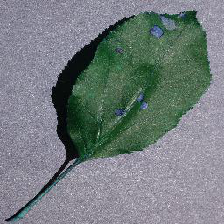

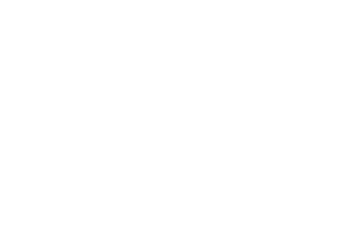

True label: Apple___Black_rot
Predicted label: Apple___Black_rot
Remedy: Remove the cankers by pruning at least 15 inches below the end and burn or bury them. Also take preventative care with new season prunings and burn them, too. Black rot can infect dead wood and freshly pruned wounds. Trim your trees when they are dormant, disinfect tools between cuts, and burn the branches and leaves.


In [121]:
from google.colab.patches import cv2_imshow
x, y = next(test_gen)
image = x[0, :, :, :]
true_index = np.argmax(y[0])
cv2_imshow(image)
plt.axis('off')
plt.show()

# Expand the validation image to (1, 224, 224, 3) before predicting the label
prediction_scores = mobilenet_model.predict(np.expand_dims(image, axis=0))
predicted_index = np.argmax(prediction_scores)
print("True label: " + labels_list[true_index])
print("Predicted label: " + labels_list[predicted_index])
print('Remedy:', labels_remedies[predicted_index][2])

In [103]:
!pip install tensorflowjs

In [104]:
import tensorflowjs as tfjs

In [105]:
tfjs.converters.save_keras_model(mobilenet_model, '/content/gdrive/MyDrive/Kaggle/Machine Learning Model')

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


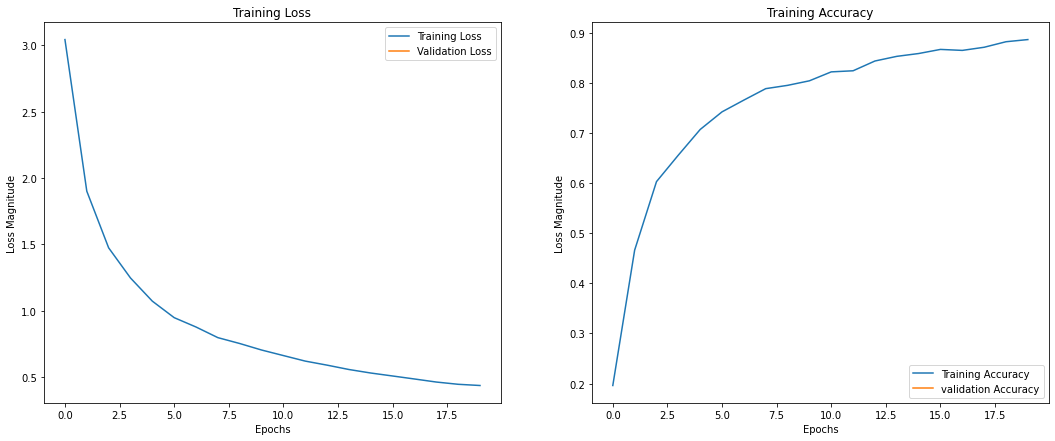

In [101]:
# Learning Curves.
# Plot Loss vs Accuracy graphs.

plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.grid(False)
plt.xlabel('Epochs')
plt.ylabel('Loss Magnitude')
plt.title('Training Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['categorical_accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label = 'validation Accuracy')
plt.grid(False)
plt.xlabel('Epochs')
plt.ylabel('Loss Magnitude')
plt.title('Training Accuracy')
plt.legend(loc='lower right')
plt.show()